In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
from pandas.plotting import scatter_matrix
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv(r"C:\Users\Monster\Downloads\diabetes.csv")

In [3]:
import sklearn

In [4]:
df.head() #get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [6]:
df.columns #learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.dtypes #knowledge of data type helps for computation

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df=df.drop_duplicates()

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [13]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

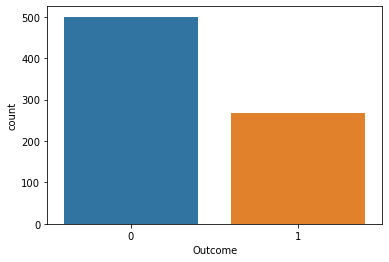

In [14]:
sns.countplot('Outcome',data=df)

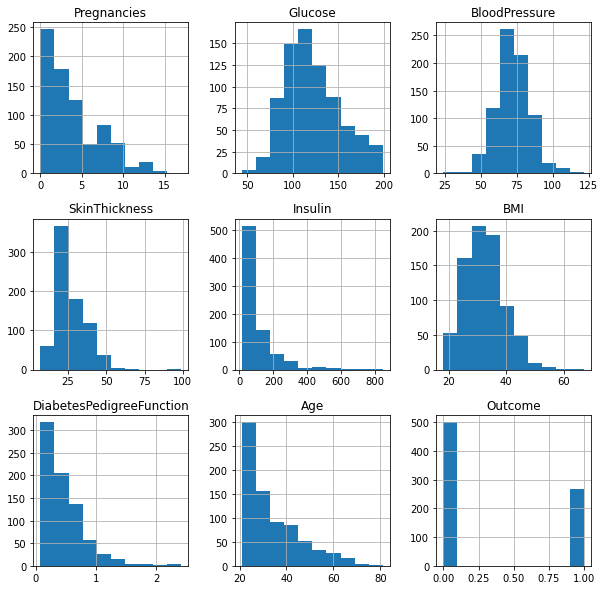

In [15]:
df.hist(bins=10,figsize=(10,10))
plt.show()


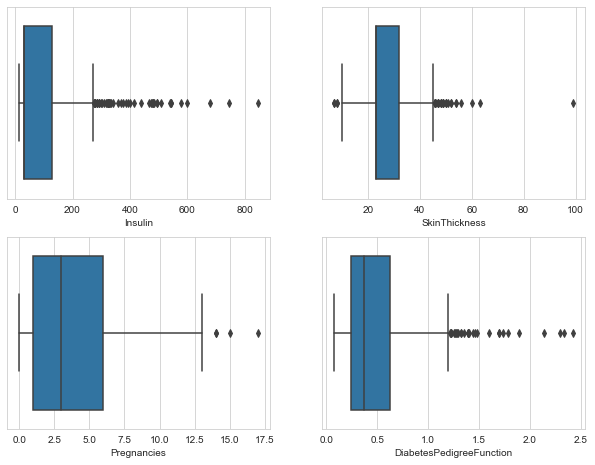

In [16]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
#sns.boxplot(x='Glucose',data=df)
#plt.subplot(3,3,2)
#sns.boxplot(x='BloodPressure',data=df)
#plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,2)
#sns.boxplot(x='BMI',data=df)
#plt.subplot(3,3,5)
#sns.boxplot(x='Age',data=df)
#plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

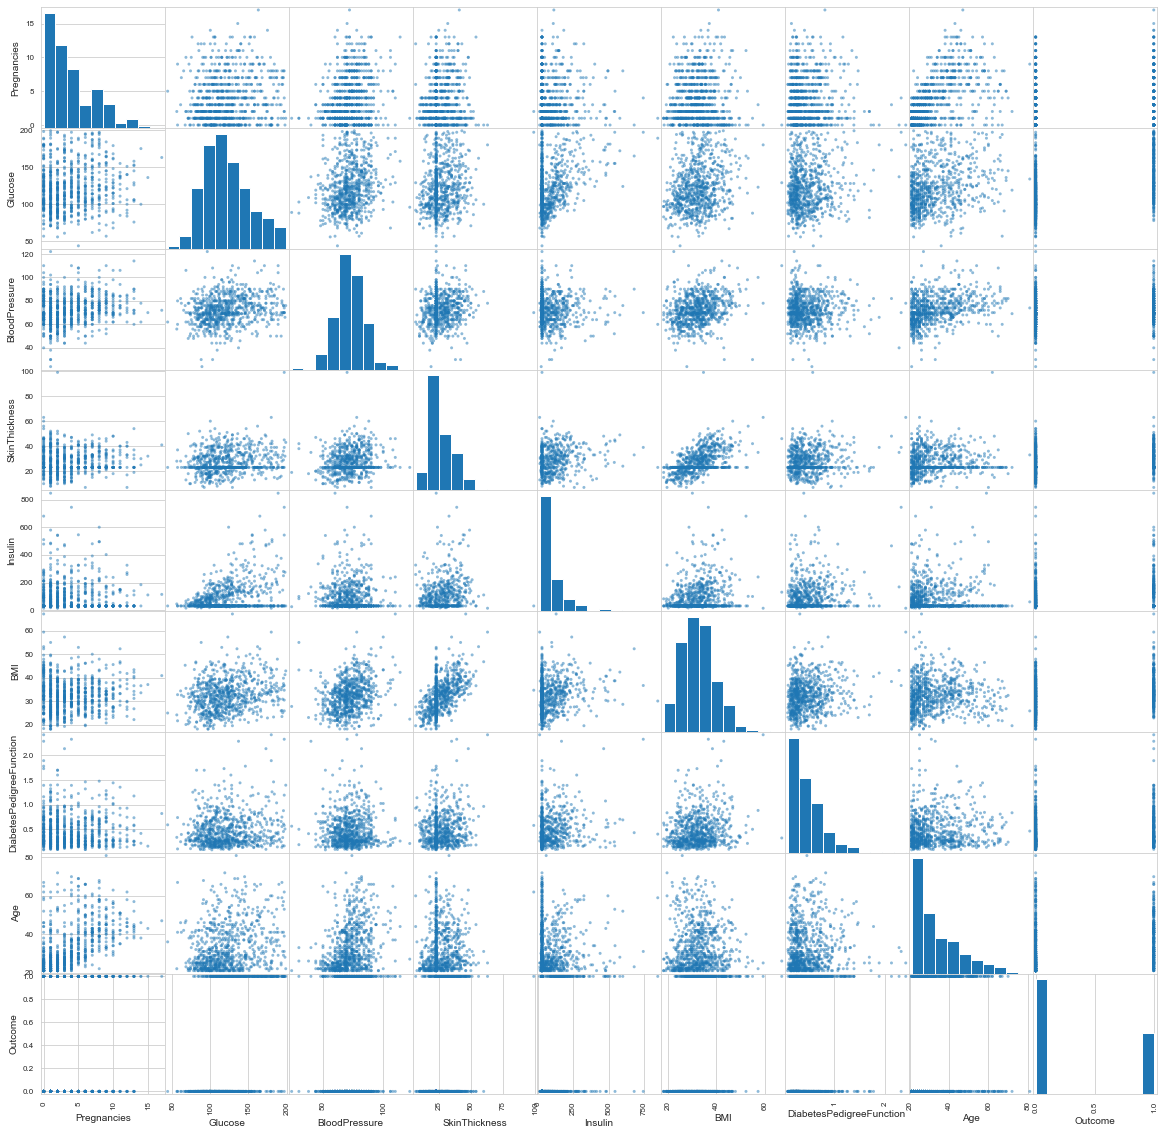

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));
# we can come to various conclusion looking at these plots for example  
#if you observe 5th plot in pregnancies with insulin, you can conclude that
#women with higher number of pregnancies have lower insulin

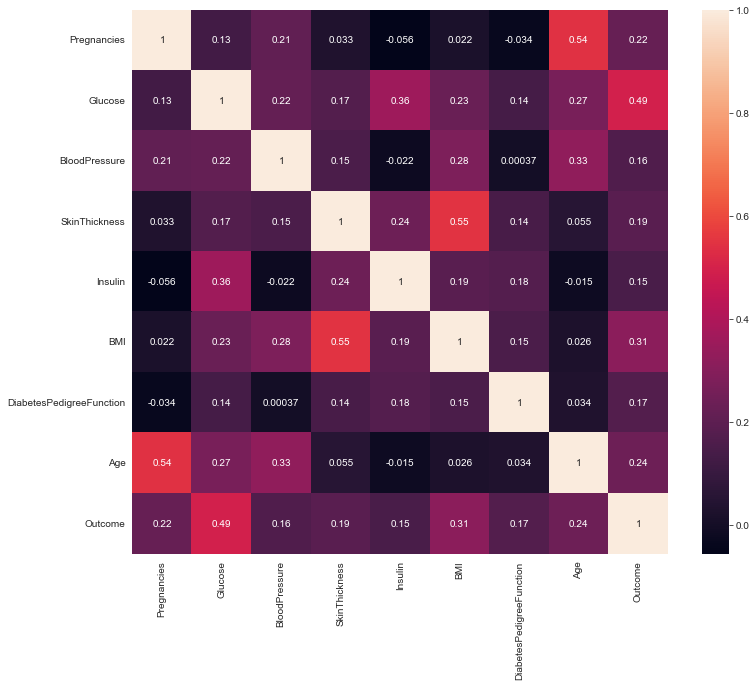

In [18]:
correlation = df.corr()
plt.figure(figsize = (12,10))
sns.heatmap(correlation,annot = True)

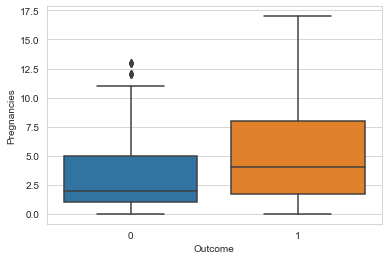

In [19]:
sns.boxplot(x='Outcome',y='Pregnancies',data=df)
plt.show()

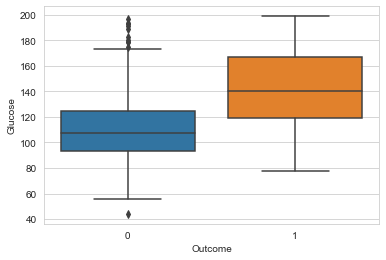

In [20]:
sns.boxplot(x='Outcome',y='Glucose',data=df)
plt.show()

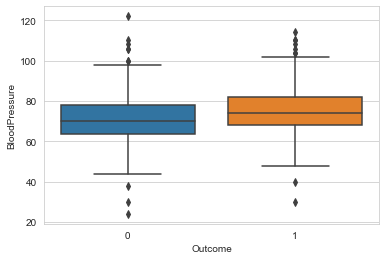

In [21]:
sns.boxplot(x='Outcome',y='BloodPressure',data=df)
plt.show()

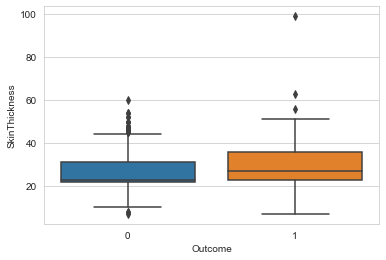

In [22]:
sns.boxplot(x='Outcome',y='SkinThickness',data=df)
plt.show()

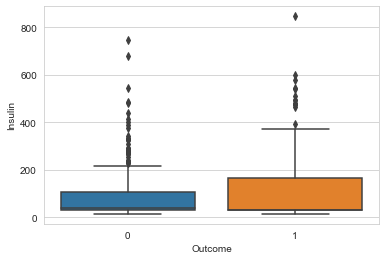

In [23]:
sns.boxplot(x='Outcome',y='Insulin',data=df)
plt.show()

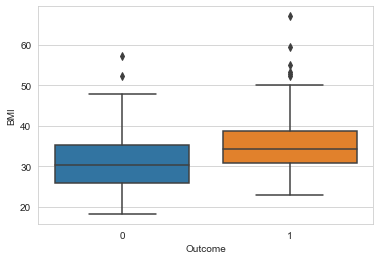

In [24]:
sns.boxplot(x='Outcome',y='BMI',data=df)
plt.show()

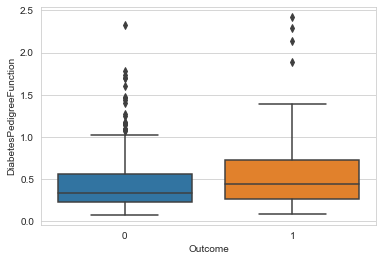

In [25]:
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df)
plt.show()

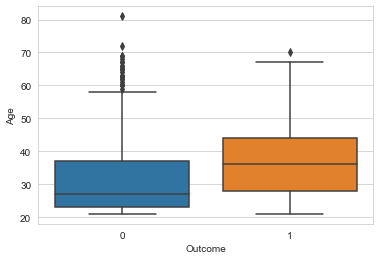

In [26]:
sns.boxplot(x='Outcome',y='Age',data=df)
plt.show()

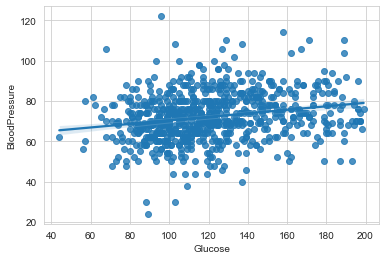

In [27]:
# scatter plot between glucose and  Blood pressure with regression line
sns.regplot(x = "Glucose",y = "BloodPressure",data = df)
plt.show()

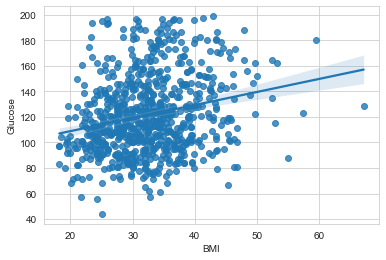

In [28]:
sns.regplot(x='BMI', y= 'Glucose', data=df)
plt.show()

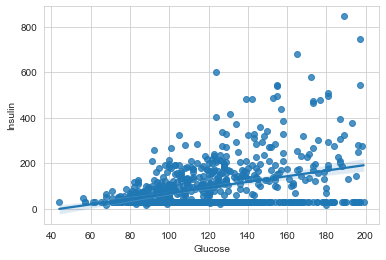

In [29]:
sns.regplot(x='Glucose', y= 'Insulin', data=df)
plt.show()

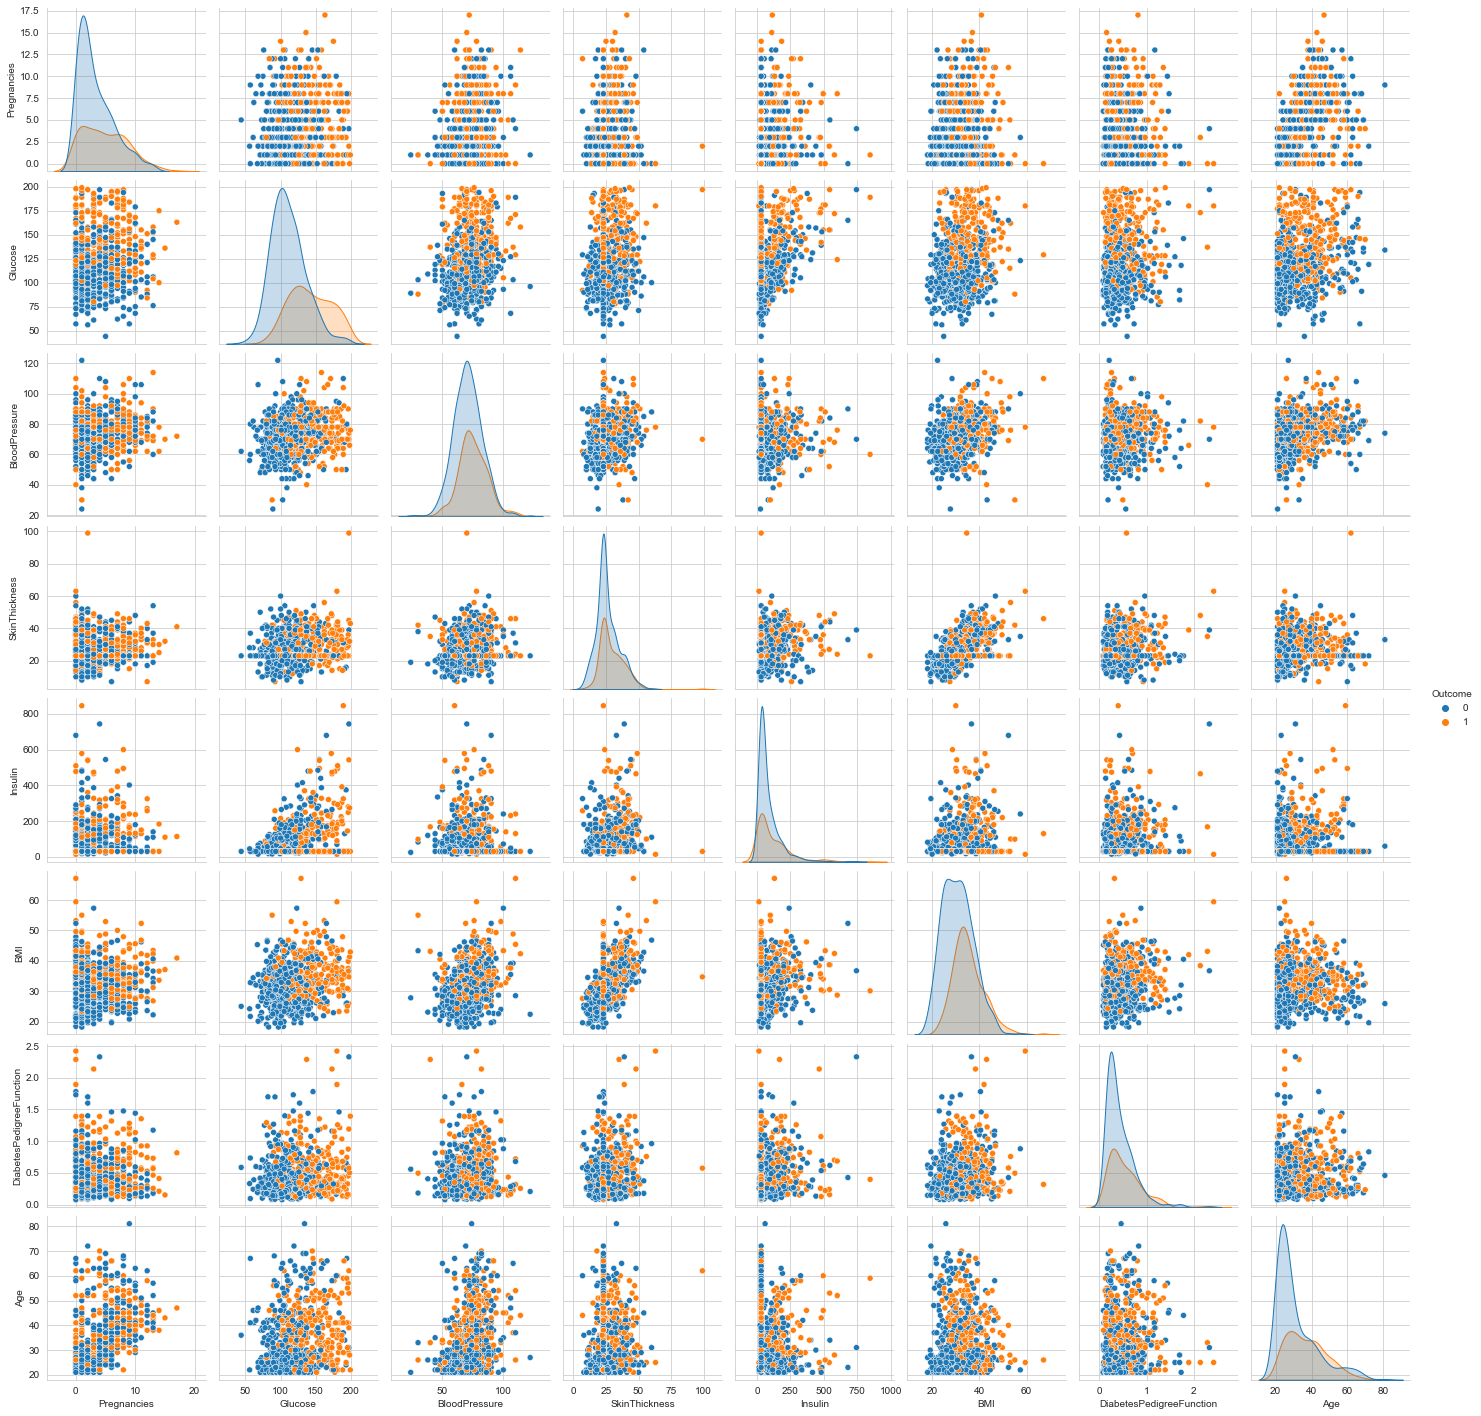

In [30]:
sns.pairplot(df,hue='Outcome')
plt.show()

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [33]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


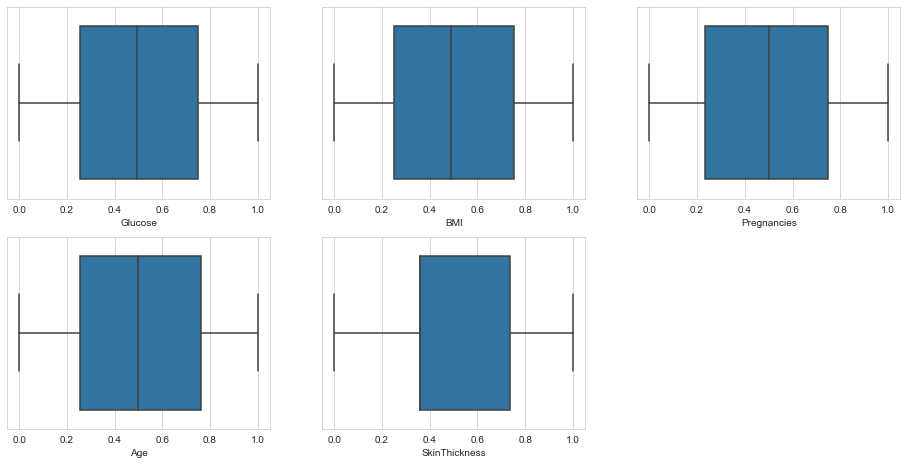

In [34]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)